In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
rs = 125

In [4]:
# Ignore any deprecation warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [5]:
tumor_df = pd.read_csv("tumors.csv")
tumor_df.head(5)

,leukocyte_count,blood_pressure,tumor_class
0,13.472969,15.250393,malignant
1,10.805510,14.109676,malignant
2,13.834053,15.793920,malignant
3,9.572811,17.873286,malignant
4,7.633667,16.598559,malignant


In [6]:
tumor_df.columns

Index(['leukocyte_count', 'blood_pressure', 'tumor_class'], dtype='object')

In [7]:
X = tumor_df.iloc[:, :-1]
y = tumor_df.iloc[:, -1:]

In [8]:
X.describe()

,leukocyte_count,blood_pressure
count,1000.000000,1000.000000
mean,14.951821,15.346599
std,2.945563,1.085929
min,4.201801,11.736217
25%,12.944757,14.623807
50%,14.953817,15.331944
75%,16.984188,16.054340
max,23.796870,18.370500


In [9]:
y.value_counts(normalize = True)

tumor_class
malignant      0.611
benign         0.389
dtype: float64

<AxesSubplot:xlabel='tumor_class'>

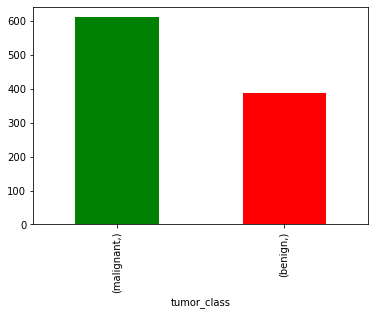

In [10]:
y.value_counts().plot.bar(color=['green', 'red'])

We have about 65% benign tumors (`Class = 0`) and 35% cancerous tumors (`Class = 1`), which is not a very imbalanced class distribution.

## Split training and testing datasets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=rs)

## Train and evaluate a KNN classifier with the number of neighbors set to 2


In [12]:
knn_model = KNeighborsClassifier(n_neighbors=2)

In [13]:
#.ravel() flattens the array to ensure it is a 1-dimensional array.
knn_model.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=2)

In [21]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='macro')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

# Assuming y_test and preds are defined
evaluate_metrics(y_test, preds)


{'accuracy': 0.99,
 'recall': 0.989491382934006,
 'precision': 0.989491382934006,
 'f1score': 0.989491382934006}

## Coding exercise: Train and evaluate a KNN classifier with number of neighbors set to 5


In [26]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train.values.ravel())
preds = model.predict(X_test)
evaluate_metrics(y_test, preds)

{'accuracy': 0.98,
 'recall': 0.9789827658680117,
 'precision': 0.9789827658680117,
 'f1score': 0.9789827658680117}

## Tune the number of neighbors to find the optmized one


OK, you may wonder which n_neighbors argument may give you the best classification performance. We can try different n_neighbors (the K value) and check which K gives the best classification performance.

Here we could try K from 1 to 50, and store the aggregated f1score for each k into a list.

In [31]:
# Try K from 1 to 50
max_k = 50
# Create an empty list to store f1score for each k
f1_scores = []

Then we will train 50 KNN classifiers with K ranged from 1 to 50

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import pandas as pd

# Initialize an empty list to store the f1 scores
f1_scores = []

# Loop through values of k from 1 to max_k
max_k = 50  # Example value; replace with the desired max_k
for k in range(1, max_k + 1):
    # Create a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Train the classifier
    knn.fit(X_train, y_train.values.ravel())
    # Predict the labels for the test set
    preds = knn.predict(X_test)
    # Evaluate the classifier with f1_score
    f1 = f1_score(y_test, preds, average='macro')  # Use 'macro' or 'micro'
    f1_scores.append((k, round(f1, 4)))

# Convert the f1_scores list to a dataframe
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
f1_results.set_index('K', inplace=True)

# Display the f1_results DataFrame
print(f1_results)


    F1 Score
K           
1     0.9789
2     0.9895
3     0.9842
4     0.9790
5     0.9790
6     0.9790
7     0.9790
8     0.9843
9     0.9843
10    0.9843
11    0.9843
12    0.9843
13    0.9843
14    0.9895
15    0.9895
16    0.9895
17    0.9895
18    0.9895
19    0.9895
20    0.9895
21    0.9895
22    0.9895
23    0.9895
24    0.9895
25    0.9895
26    0.9895
27    0.9895
28    0.9895
29    0.9895
30    0.9895
31    0.9895
32    0.9895
33    0.9843
34    0.9843
35    0.9843
36    0.9791
37    0.9843
38    0.9843
39    0.9843
40    0.9895
41    0.9895
42    0.9895
43    0.9843
44    0.9843
45    0.9843
46    0.9843
47    0.9843
48    0.9843
49    0.9843
50    0.9843


Text(0.5, 1.0, 'KNN F1 Score')

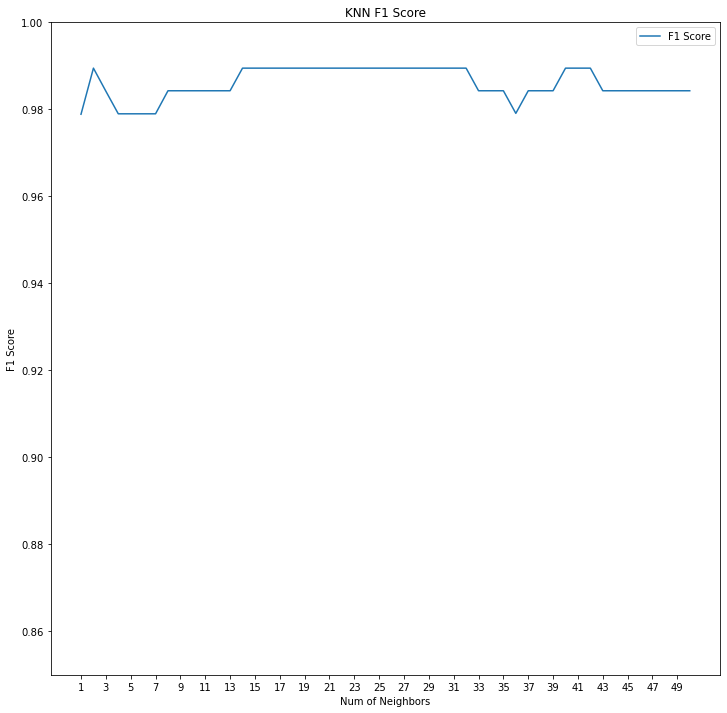

In [34]:
# Plot F1 results
ax = f1_results.plot(figsize=(12, 12))
ax.set(xlabel='Num of Neighbors', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.ylim((0.85, 1))
plt.title('KNN F1 Score')